In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the Original Dataset (A - Clean Data)
df_a = pd.read_csv("healthcare-dataset-stroke-data.csv")

**Creating the Duplicate Dataset**

In [3]:
# Creating the Duplicate Dataset (B - Corrupt Data)
df_b = df_a.copy()

In [4]:
# Introducing Duplicate Records
duplicates = df_b.sample(frac=0.05, random_state=42)  # 5% duplicates
df_b = pd.concat([df_b, duplicates], ignore_index=True)

In [5]:
# Introducing Inconsistent Formatting
df_b['gender'] = df_b['gender'].apply(lambda x: x.lower() if np.random.rand() > 0.5 else x.upper())
df_b['ever_married'] = df_b['ever_married'].apply(lambda x: x.lower())
df_b.loc[df_b.sample(frac=0.03, random_state=42).index, 'work_type'] = 'Govt_job'  # Introduce typo

In [6]:
# Introducing Missing Values
df_b.loc[df_b.sample(frac=0.05, random_state=42).index, 'bmi'] = np.nan  # 5% missing BMI

In [7]:
# Introducing Invalid Values
df_b.loc[df_b.sample(frac=0.02, random_state=42).index, 'age'] = -10  # Negative ages
df_b.reset_index(drop=True, inplace=True)

**Data Inspection**

In [8]:
# Checking the data info
print("\nData Inspection:")
print("Columns:", df_b.columns)
print("Shape:", df_b.shape)
print("Size:", df_b.size)
print("Number of Rows:", len(df_b))
print("First 5 Rows:\n", df_b.head())
print("Last 5 Rows:\n", df_b.tail())


Data Inspection:
Columns: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
Shape: (5366, 12)
Size: 64392
Number of Rows: 5366
First 5 Rows:
       id  gender   age  hypertension  heart_disease ever_married  \
0   9046    MALE  67.0             0              1          yes   
1  51676  female  61.0             0              0          yes   
2  31112    male  80.0             0              1          yes   
3  60182  FEMALE  49.0             0              0          yes   
4   1665  female  79.0             1              0          yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     nev

**Data Cleaning**

In [11]:
# Checking the Missing Values & Duplicate Records in Datasets A and B
def data_quality_report(df, name):
    print(f"\nData Quality Report for {name} Dataset")
    print("-" * 70)
    print(f"Shape: {df.shape}")

    # Missing Values
    missing_values = df.isnull().sum()
    total_missing = missing_values.sum()
    print(f"Missing Values (Total): {total_missing} out of {df.size} ({(total_missing / df.size) * 100:.2f}%)")
    print("Missing Values by Column:")
    for col, count in missing_values.items():
      if count > 0:
         print(f"  {col}: {count} ({(count / len(df)) * 100:.2f}%)")

    # Duplicate Records
    duplicates = df.duplicated()
    duplicate_count = duplicates.sum()
    print(f"\nDuplicate Records (Total): {duplicate_count}")
    if duplicate_count > 0:
        print("Duplicate Rows:")
        print(df[duplicates])

    print("\nColumn Data Types:")
    print(df.dtypes)
    print("-" * 70)

data_quality_report(df_a, "A (Clean Data)")
data_quality_report(df_b, "B (Corrupt Data)")


Data Quality Report for A (Clean Data) Dataset
----------------------------------------------------------------------
Shape: (5110, 12)
Missing Values (Total): 201 out of 61320 (0.33%)
Missing Values by Column:
  bmi: 201 (3.93%)

Duplicate Records (Total): 0

Column Data Types:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
----------------------------------------------------------------------

Data Quality Report for B (Corrupt Data) Dataset
----------------------------------------------------------------------
Shape: (5366, 12)
Missing Values (Total): 470 out of 64392 (0.73%)
Missing Values by Column:
  bmi: 470 (8.76%)

Duplicate Records (Total): 105
Duplicate Rows:
     

In [16]:
# Cleaning the B Dataset
df_b_cleaned = df_b.copy()

In [17]:
# Placing the Missing Values by doing median
df_b_cleaned['bmi'].fillna(df_b_cleaned['bmi'].median(), inplace=True)
# Printing the bmi values
print(df_b_cleaned[df_b_cleaned['bmi'] > df_b_cleaned['bmi'].median()]['bmi'])

0       36.6
2       32.5
3       34.4
5       29.0
10      29.7
        ... 
5352    29.6
5354    44.1
5357    29.4
5360    36.8
5361    30.3
Name: bmi, Length: 2427, dtype: float64


<ipython-input-17-7ec4e986eeda>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_b_cleaned['bmi'].fillna(df_b_cleaned['bmi'].median(), inplace=True)


In [18]:
# Standardize Formatting
df_b_cleaned['gender'] = df_b_cleaned['gender'].str.lower()
df_b_cleaned['ever_married'] = df_b_cleaned['ever_married'].str.lower()
df_b_cleaned['work_type'] = df_b_cleaned['work_type'].replace({'Govt_job': 'Government'}).str.lower()
df_b_cleaned['smoking_status'] = df_b_cleaned['smoking_status'].str.lower()
df_b_cleaned['Residence_type'] = df_b_cleaned['Residence_type'].str.lower()

# Renaming the column from 'Residence_type' to 'residence_type'
df_b_cleaned = df_b_cleaned.rename(columns={'Residence_type': 'residence_type'})


In [19]:
# Correct Invalid Values
df_b_cleaned = df_b_cleaned[df_b_cleaned['age'] >= 0]  # Remove negative ages

In [20]:
# Convert 'age' column to integer type
df_b_cleaned['age'] = df_b_cleaned['age'].astype(int)

In [21]:
# Display data types again to verify the change
print("\nData Types after conversion:\n", df_b_cleaned.dtypes)


Data Types after conversion:
 id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [22]:
# Checking if missing values are removed
print("\nMissing Values After Cleaning:")
print(f"Number of Missing Values: {df_b_cleaned.isnull().sum().sum()}")

# Remove duplicates
df_b_cleaned = df_b_cleaned.drop_duplicates()

# Checking if duplicates are removed
print("\nDuplicate Records After Cleaning:")
print(f"Number of Duplicate Records: {df_b_cleaned.duplicated().sum()}")

# Printing the cleaned dataset to check
print("\nCleaned Dataset (df_b_cleaned):\n", df_b_cleaned)


Missing Values After Cleaning:
Number of Missing Values: 0

Duplicate Records After Cleaning:
Number of Duplicate Records: 0

Cleaned Dataset (df_b_cleaned):
          id  gender  age  hypertension  heart_disease ever_married  \
0      9046    male   67             0              1          yes   
1     51676  female   61             0              0          yes   
2     31112    male   80             0              1          yes   
3     60182  female   49             0              0          yes   
4      1665  female   79             1              0          yes   
...     ...     ...  ...           ...            ...          ...   
5339  32221    male   60             0              1          yes   
5340  24592  female   51             1              0          yes   
5354  57419    male   59             0              0          yes   
5360  55351    male   63             0              0          yes   
5362  37713    male   29             0              0          yes   


In [23]:
# Creating the Data Quality Score Calculation
def calculate_data_quality_score(df):
    total_cells = df.size
    missing_values = df.isnull().sum().sum()
    duplicate_records = df.duplicated().sum()
    invalid_ages = (df['age'] < 0).sum()

    completeness_score = ((total_cells - missing_values) / total_cells) * 100
    uniqueness_score = ((df.shape[0] - duplicate_records) / df.shape[0]) * 100
    validity_score = ((df.shape[0] - invalid_ages) / df.shape[0]) * 100
    overall_score = (completeness_score + uniqueness_score + validity_score) / 3

    return {
        'Completeness Score': completeness_score,
        'Uniqueness Score': uniqueness_score,
        'Validity Score': validity_score,
        'Overall Data Quality Score': overall_score
    }


dq_score_before = calculate_data_quality_score(df_b)
dq_score_after = calculate_data_quality_score(df_b_cleaned)

print("\nData Quality Score Before Cleaning:")
print(dq_score_before)

print("\nData Quality Score After Cleaning:")
print(dq_score_after)


Data Quality Score Before Cleaning:
{'Completeness Score': 99.27009566405765, 'Uniqueness Score': 98.04323518449497, 'Validity Score': 98.00596347372344, 'Overall Data Quality Score': 98.43976477409201}

Data Quality Score After Cleaning:
{'Completeness Score': 100.0, 'Uniqueness Score': 100.0, 'Validity Score': 100.0, 'Overall Data Quality Score': 100.0}


In [27]:
# Comparing the both data records of datasets A and B
def print_data_quality_record(record):
    print("-" * 70)
    for key, value in record.items():
        print(f"{key:<30}: {value}")
    print("-" * 70)

# Define the generate_data_quality_record function
def generate_data_quality_record(df, name):
    """Generates a data quality record for a given DataFrame."""
    # Calculate data quality metrics
    num_rows = df.shape[0]
    num_cols = df.shape[1]
    total_cells = df.size
    missing_values = df.isnull().sum().sum()
    duplicate_records = df.duplicated().sum()

    # Calculate completeness score
    completeness_score = ((total_cells - missing_values) / total_cells) * 100

    # Calculate uniqueness score
    uniqueness_score = ((num_rows - duplicate_records) / num_rows) * 100

    # Calculate validity score (assuming 'age' column for validity check)
    invalid_ages = (df['age'] < 0).sum()
    validity_score = ((num_rows - invalid_ages) / num_rows) * 100

    # Calculate overall data quality score
    overall_score = (completeness_score + uniqueness_score + validity_score) / 3

    # Create the data quality record dictionary
    record = {
        'Dataset Name': name,
        'Number of Rows': num_rows,
        'Number of Columns': num_cols,
        'Total Cells': total_cells,
        'Missing Values': missing_values,
        'Duplicate Records': duplicate_records,
        'Completeness Score': completeness_score,
        'Uniqueness Score': uniqueness_score,
        'Validity Score': validity_score,
        'Overall Data Quality Score': overall_score # Added Overall Data Quality Score
        # ... Add other metrics as needed ...
    }
    return record

# Generate Data Quality Reports
dq_record_before = generate_data_quality_record(df_b, "B (Corrupt Data)")
dq_record_after = generate_data_quality_record(df_b_cleaned, "B (Cleaned Data)")

# Print Data Quality Records using the new function
print("\nData Quality Record BEFORE Cleaning:")
print_data_quality_record(dq_record_before)

print("\nData Quality Record AFTER Cleaning:")
print_data_quality_record(dq_record_after)


Data Quality Record BEFORE Cleaning:
----------------------------------------------------------------------
Dataset Name                  : B (Corrupt Data)
Number of Rows                : 5366
Number of Columns             : 12
Total Cells                   : 64392
Missing Values                : 470
Duplicate Records             : 105
Completeness Score            : 99.27009566405765
Uniqueness Score              : 98.04323518449497
Validity Score                : 98.00596347372344
Overall Data Quality Score    : 98.43976477409201
----------------------------------------------------------------------

Data Quality Record AFTER Cleaning:
----------------------------------------------------------------------
Dataset Name                  : B (Cleaned Data)
Number of Rows                : 5056
Number of Columns             : 12
Total Cells                   : 60672
Missing Values                : 0
Duplicate Records             : 0
Completeness Score            : 100.0
Uniqueness Score

In [ ]:
# Comparing of A and B (Before and After Cleaning)
print("\nSummary Statistics - Clean Data A")
print(df_a.describe())
print("\nSummary Statistics - Corrupt Data B Before Cleaning")
print(df_b.describe())
print("\nSummary Statistics - B After Cleaning")
print(df_b_cleaned.describe())


Summary Statistics - Clean Data A


                 id          age  hypertension  heart_disease  \
count   5135.000000  5135.000000   5135.000000    5135.000000   
mean   36512.559883    43.240273      0.097955       0.053749   
std    21160.038502    22.626362      0.297283       0.225543   
min       67.000000     0.080000      0.000000       0.000000   
25%    17748.500000    25.000000      0.000000       0.000000   
50%    36922.000000    45.000000      0.000000       0.000000   
75%    54669.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5135.000000  4931.000000  5135.000000  
mean          106.076386    28.889657     0.048491  
std            45.214656     7.855748     0.214822  
min            55.120000    10.300000     0.000000  
25%            77.250000    23.500000     0.000000  
50%            91.850000    28.100000     0.000000  
75%           114.015000    33.100000     0

**Exploratory of Data Analysis**

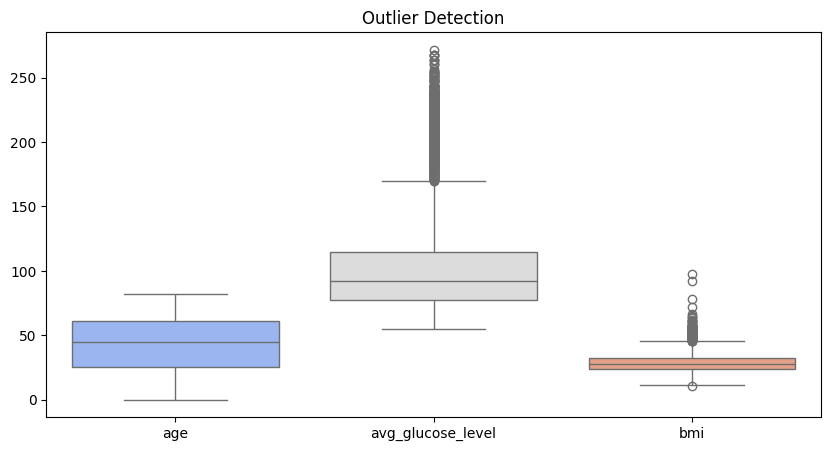

In [ ]:
# Boxplot to detect outliers in numerical features
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_b_cleaned[['age', 'avg_glucose_level', 'bmi']], palette="coolwarm")
plt.title("Outlier Detection")
plt.show()

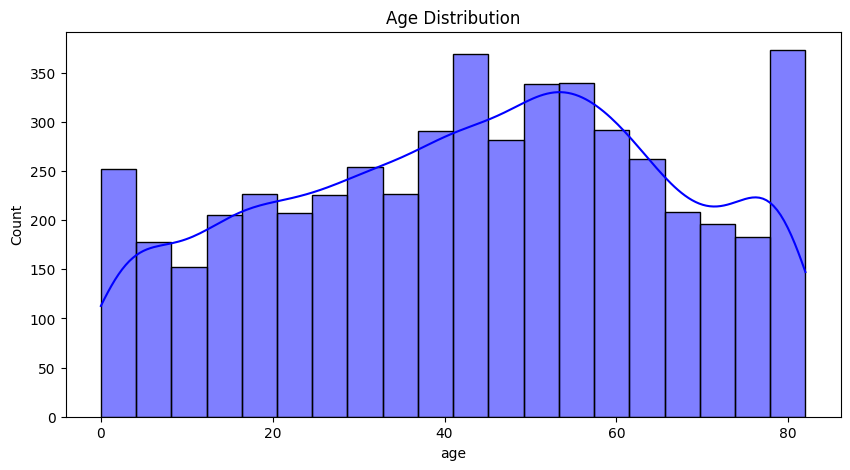

In [ ]:
# Histplot to see the Age Distribution in Count
plt.figure(figsize=(10, 5))
sns.histplot(data=df_b_cleaned['age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution")
plt.show()

C:\Users\sai.achyuta\AppData\Local\Temp\ipykernel_13276\1622668061.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_b_cleaned, x='stroke', palette="coolwarm")


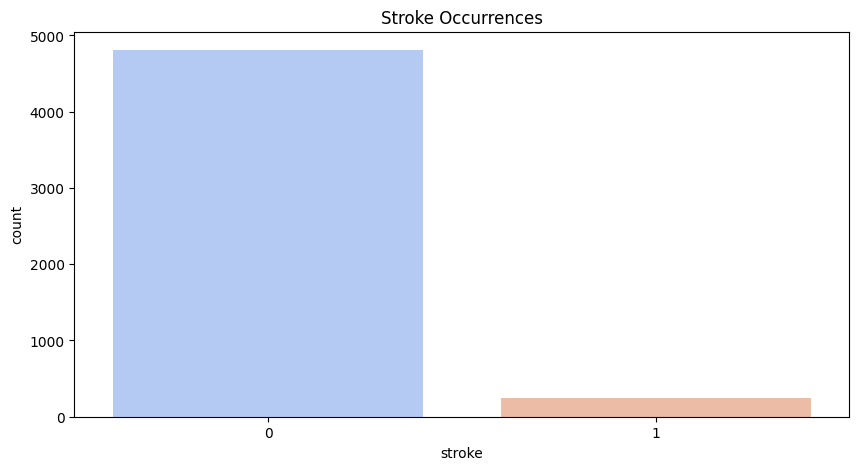

In [ ]:
# Count plot of stroke occurrences
plt.figure(figsize=(10, 5))
sns.countplot(data=df_b_cleaned, x='stroke', palette="coolwarm")
plt.title("Stroke Occurrences")
plt.show()

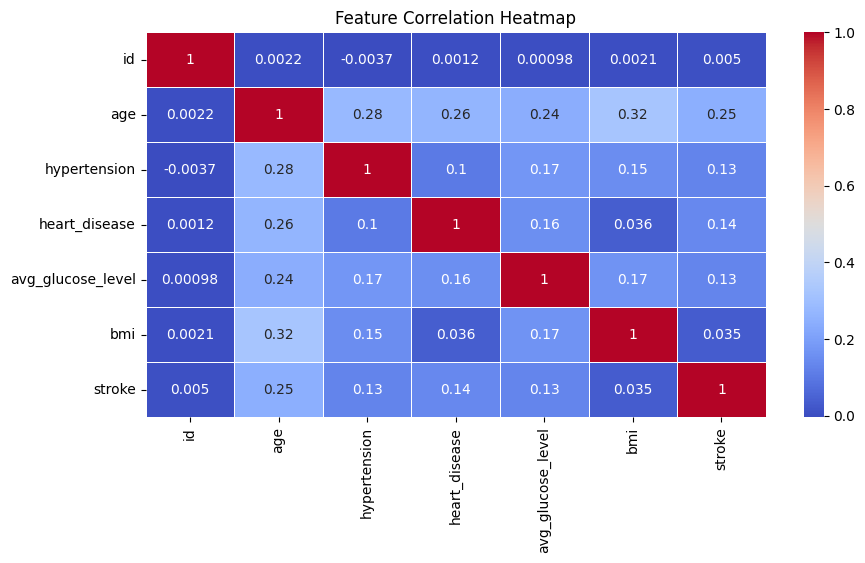

In [ ]:
# Compute correlation matrix
numerical_features = df_b_cleaned.select_dtypes(include=['number'])
corr_matrix = numerical_features.corr()

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\sai.achyuta\AppData\Local\Temp\ipykernel_13276\2842038061.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_b_cleaned, x='stroke', y='age', palette="coolwarm")


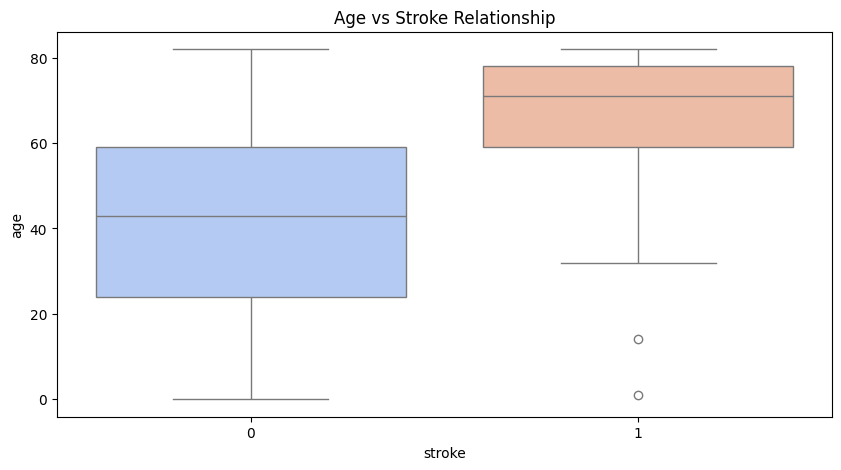

In [ ]:
# Relationship between Age & Stroke
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_b_cleaned, x='stroke', y='age', palette="coolwarm")
plt.title("Age vs Stroke Relationship")
plt.show()

C:\Users\sai.achyuta\AppData\Local\Temp\ipykernel_13276\4029780950.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_b_cleaned[df_b_cleaned['stroke'] == 1]['avg_glucose_level'], shade=True, color="red", label="Stroke")
C:\Users\sai.achyuta\AppData\Local\Temp\ipykernel_13276\4029780950.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_b_cleaned[df_b_cleaned['stroke'] == 0]['avg_glucose_level'], shade=True, color="blue", label="No Stroke")


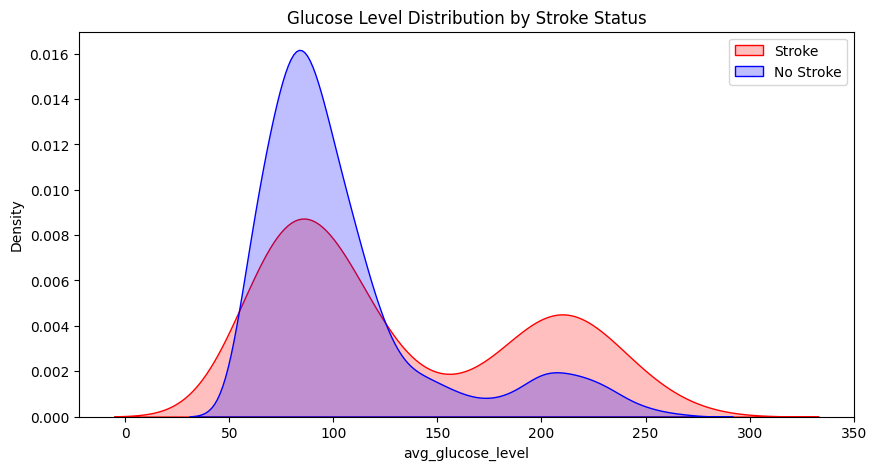

In [ ]:
# Glucose level vs Stroke Analysis
plt.figure(figsize=(10, 5))
sns.kdeplot(df_b_cleaned[df_b_cleaned['stroke'] == 1]['avg_glucose_level'], shade=True, color="red", label="Stroke")
sns.kdeplot(df_b_cleaned[df_b_cleaned['stroke'] == 0]['avg_glucose_level'], shade=True, color="blue", label="No Stroke")
plt.title("Glucose Level Distribution by Stroke Status")
plt.legend()
plt.show()

C:\Users\sai.achyuta\AppData\Local\Temp\ipykernel_13276\3483629701.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_b_cleaned, x='smoking_status', palette='coolwarm')


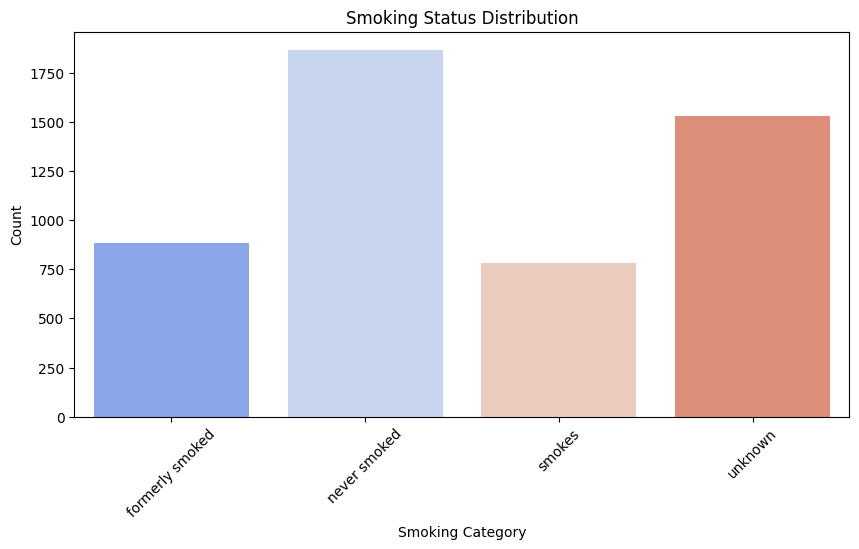

In [ ]:
# Smoking Status Distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df_b_cleaned, x='smoking_status', palette='coolwarm')
plt.title("Smoking Status Distribution")
plt.xlabel("Smoking Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\sai.achyuta\AppData\Local\Temp\ipykernel_13276\3406286899.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_b_cleaned, x="smoking_status", y="stroke", ci=None, palette='coolwarm')
C:\Users\sai.achyuta\AppData\Local\Temp\ipykernel_13276\3406286899.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_b_cleaned, x="smoking_status", y="stroke", ci=None, palette='coolwarm')


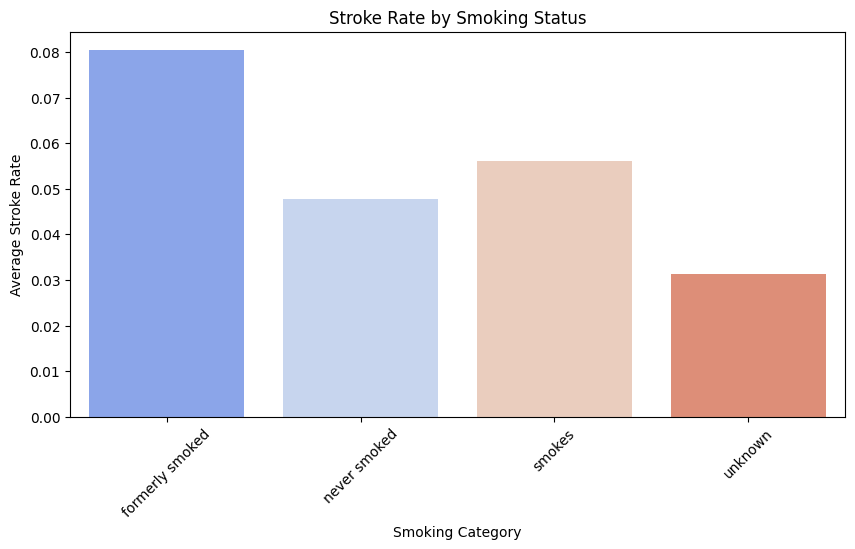

In [ ]:
# Stroke Rates by Smoking Status
plt.figure(figsize=(10,5))
sns.barplot(data=df_b_cleaned, x="smoking_status", y="stroke", ci=None, palette='coolwarm')
plt.title("Stroke Rate by Smoking Status")
plt.xlabel("Smoking Category")
plt.ylabel("Average Stroke Rate")
plt.xticks(rotation=45)
plt.show()

C:\Users\sai.achyuta\AppData\Local\Temp\ipykernel_13276\2489618832.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_b_cleaned, x="smoking_status", y="bmi", palette="coolwarm")


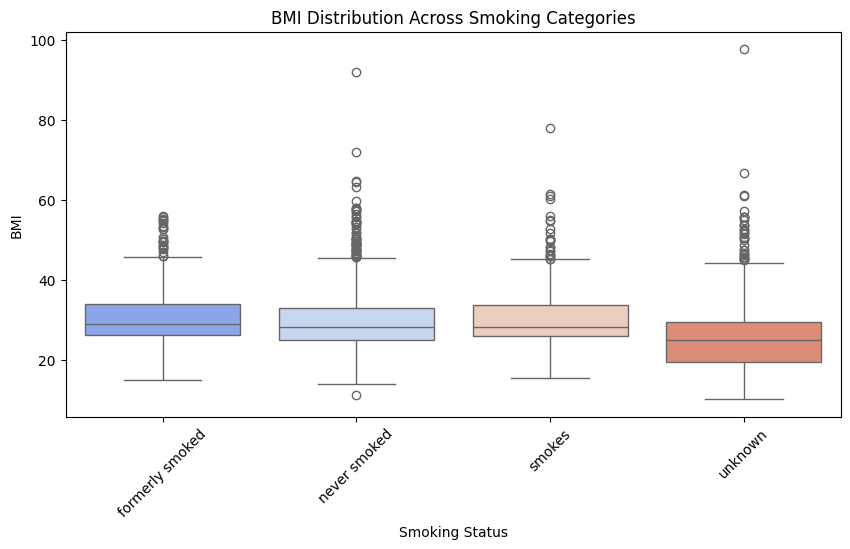

In [ ]:
# Boxplot: BMI by Smoking Status
plt.figure(figsize=(10,5))
sns.boxplot(data=df_b_cleaned, x="smoking_status", y="bmi", palette="coolwarm")
plt.title("BMI Distribution Across Smoking Categories")
plt.xlabel("Smoking Status")
plt.ylabel("BMI")
plt.xticks(rotation=45)
plt.show()

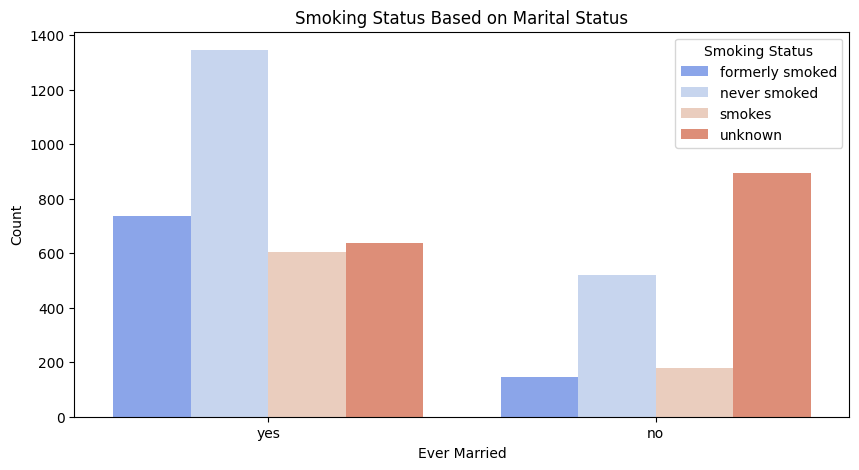

In [ ]:
# Smoking Status vs Marital Status
plt.figure(figsize=(10,5))
sns.countplot(data=df_b_cleaned, x="ever_married", hue="smoking_status", palette="coolwarm")
plt.title("Smoking Status Based on Marital Status")
plt.xlabel("Ever Married")
plt.ylabel("Count")
plt.legend(title="Smoking Status")
plt.show()

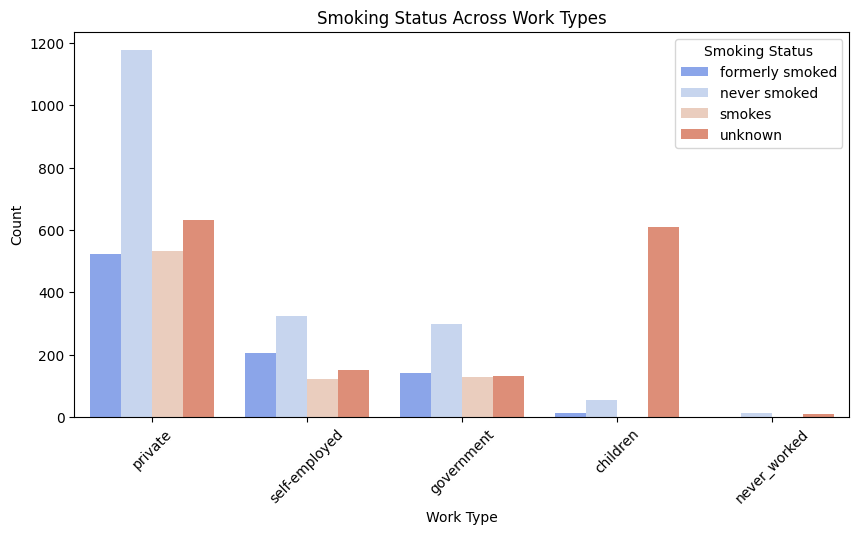

In [ ]:
# Smoking Status vs Work Type
plt.figure(figsize=(10,5))
sns.countplot(data=df_b_cleaned, x="work_type", hue="smoking_status", palette="coolwarm")
plt.title("Smoking Status Across Work Types")
plt.xlabel("Work Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Smoking Status")
plt.show()

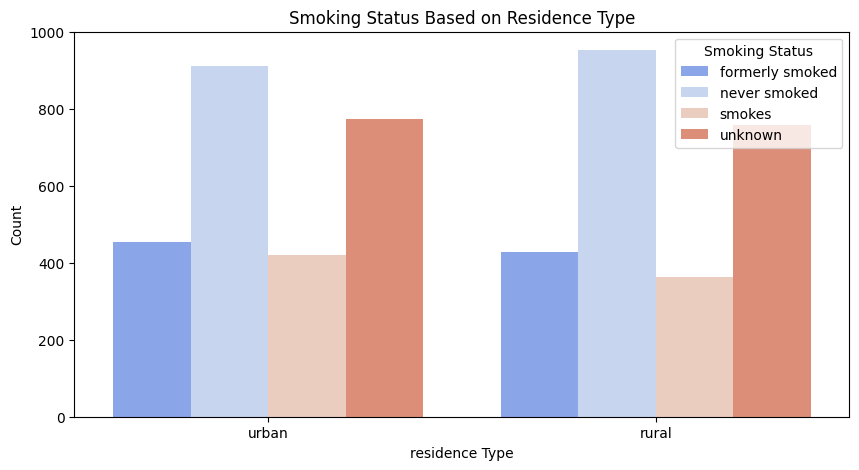

In [ ]:
# Smoking Status vs. Residence Type
plt.figure(figsize=(10,5))
sns.countplot(data=df_b_cleaned, x="residence_type", hue="smoking_status", palette="coolwarm")
plt.title("Smoking Status Based on Residence Type")
plt.xlabel("residence Type")
plt.ylabel("Count")
plt.legend(title="Smoking Status")
plt.show()

In [28]:
from google.colab import files

# Step 8: Save the Final Cleaned Dataset and download it
df_b_cleaned.to_csv("cleaned_healthcare_data.csv", index=False)
files.download("cleaned_healthcare_data.csv") # Now 'files' is defined and can be used

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>